In [1]:
# Text Based Emotion Recog using NLP Vect

In [2]:
!pip install onednn-cpu-gomp

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [4]:

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'


In [5]:
import tensorflow
print(tensorflow.__version__)

import keras
print(keras.__version__)

2023-04-14 01:08:39.494008: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-14 01:08:39.496451: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 01:08:39.536989: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 01:08:39.537729: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 01:08:42.094197: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

2.12.0
2.12.0


In [6]:
#install the NLTK (Natural Language Toolkit)
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
train=pd.read_table('train.txt', delimiter = ';', header=None, )
val=pd.read_table('val.txt', delimiter = ';', header=None, )
test=pd.read_table('test.txt', delimiter = ';', header=None, )

data = pd.concat([train ,  val , test])
data.columns = ["text", "label"]



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [8]:
data.shape

(20000, 2)

In [9]:
data.isna().any(axis=1).sum()

0

In [10]:
#text preprocessing
ps = PorterStemmer()

def preprocess(line):
    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I, and ,OR   review = ' '.join(review)
    #trun list into sentences
    return " ".join(review)


In [11]:
#install the NLTK (Natural Language Toolkit)

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u190492/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
data['text']=data['text'].apply(lambda x: preprocess(x))

In [13]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['N_label'] = label_encoder.fit_transform(data['label'])


In [14]:
data['text']

0                                       didnt feel humili
1       go feel hopeless damn hope around someon care ...
2                    im grab minut post feel greedi wrong
3          ever feel nostalg fireplac know still properti
4                                            feel grouchi
                              ...                        
1995    keep feel like someon unkind wrong think get b...
1996              im feel littl cranki neg doctor appoint
1997                feel use peopl give great feel achiev
1998    im feel comfort derbi feel though start step s...
1999    feel weird meet w peopl text like dont talk fa...
Name: text, Length: 20000, dtype: object

In [15]:
# Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data


from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))#example: the course was long-> [the,the course,the course was,course, course was, course was long,...]

data_cv = cv.fit_transform(data['text']).toarray()




In [16]:
data_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
#X_train, X_test, y_train, y_test=data_cv,test_cv,train['N_label'],test['N_label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(data_cv, data['N_label'], test_size=0.25, random_state=42)


In [28]:
# first neural network with keras tutorial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
# split into input (X) and output (y) variables
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9827 - accuracy: 0.6569 - val_loss: 0.4873 - val_accuracy: 0.8448
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3167 - accuracy: 0.8943 - val_loss: 0.4038 - val_accuracy: 0.8724
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1654 - accuracy: 0.9467 - val_loss: 0.4030 - val_accuracy: 0.8738
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1018 - accuracy: 0.9671 - val_loss: 0.4663 - val_accuracy: 0.8658
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0680 - accuracy: 0.9801 - val_loss: 0.5097 - val_accuracy: 0.8664
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.5552 - val_accuracy: 0.8666
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.6312 - val_accuracy:

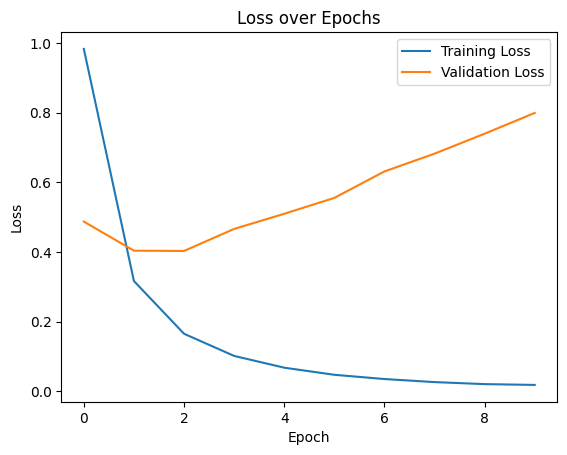

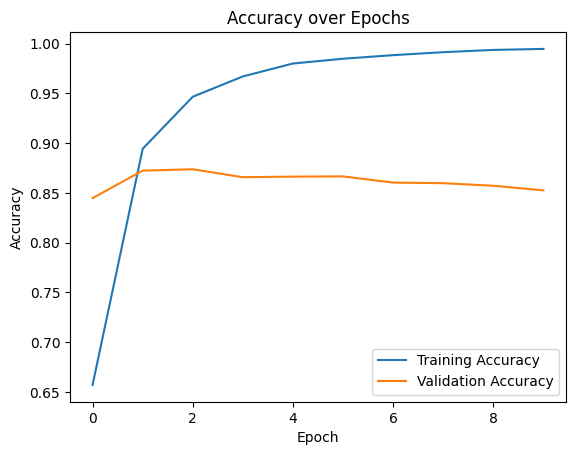

In [29]:
import matplotlib.pyplot as plt

# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [30]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

157/157 [==============================] - 0s 3ms/step - loss: 0.7990 - accuracy: 0.8526
Accuracy: 85.26


In [31]:
text='hey mad what are you doing here'
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 [==============================] - 0s 45ms/step


'anger'

In [32]:
import tensorflow as tf

In [33]:
tf.keras.models.save_model(model,'my_modelnew.h5')


In [34]:
import pickle
pickle.dump(label_encoder, open('encoder.pkl', 'wb'))
pickle.dump(cv, open('CountVectorizer.pkl', 'wb'))
